# **Temperature rise: Demonstrative EDA**

# Introduction

## Background - Global warming

The Dataset includes information about Temperature increase and an extensive list of features that represent the emissions coming from different activities of the agri-food sector. The aim of this project is to investigate the relationship between those features and temperature increase.

In doing so, an extensive exploratory data analysis will take place, as well as a correlation analysis and null values handling.

Bellow are all the variables included in the dataset:

Savanna fires: Emissions from fires in savanna ecosystems.

Forest fires: Emissions from fires in forested areas.

Crop Residues: Emissions from burning or decomposing leftover plant material after crop harvesting.

Rice Cultivation: Emissions from methane released during rice cultivation.

Drained organic soils (CO2): Emissions from carbon dioxide released when draining organic soils.

Pesticides Manufacturing: Emissions from the production of pesticides.

Food Transport: Emissions from transporting food products.

Forestland: Land covered by forests.

Net Forest conversion: Change in forest area due to deforestation and afforestation.

Food Household Consumption: Emissions from food consumption at the household level.

Food Retail: Emissions from the operation of retail establishments selling food.

On-farm Electricity Use: Electricity consumption on farms.

Food Packaging: Emissions from the production and disposal of food packaging materials.

Agrifood Systems Waste Disposal: Emissions from waste disposal in the agrifood system.

Food Processing: Emissions from processing food products.

Fertilizers Manufacturing: Emissions from the production of fertilizers.

IPPU: Emissions from industrial processes and product use.

Manure applied to Soils: Emissions from applying animal manure to agricultural soils.

Manure left on Pasture: Emissions from animal manure on pasture or grazing land.

Manure Management: Emissions from managing and treating animal manure.

Fires in organic soils: Emissions from fires in organic soils.

Fires in humid tropical forests: Emissions from fires in humid tropical forests.

On-farm energy use: Energy consumption on farms.

Rural population: Number of people living in rural areas.

Urban population: Number of people living in urban areas.

Total Population - Male: Total number of male individuals in the population.

Total Population - Female: Total number of female individuals in the population.

total_emission: Total greenhouse gas emissions from various sources.

Average Temperature °C (target) : The average increase of temperature (by year) in degrees Celsius compared to pre-industrial times.

## Objective
The objective of this project is to perform exploratory data analysis in order to:

* Understand the relationship between Temperature rise and CO2 emmission derriving from the agri-food sector activities.
* Investigate the relationship amongst an extensive list of agri-food processes CO2 emmisions and average temperature rise.
* Identify any potential correlations between the agri-food sector emmissions and average temperature increase.
* Identify interesting insights related to the emissions categories.
* Showcase the use of Choropleth maps for continuous data visualisation per country.

# Import the libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pycountry is a great library that comes with all the country names, flags, official country names, common names and country codes.
##This will be useful in creating the map charts.
!pip install pycountry
import pycountry

import plotly.express as px # I will use plotly.express to plot the choropleth maps
from sklearn.preprocessing import MinMaxScaler  # MinMaxScaler to standardize the data to take values between 0 and 1.

from sklearn.experimental import enable_iterative_imputer # I need .experimental, .impute, .linear_model for data imputation using the MICE framework.
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression






# Load the dataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Agrofood_co2_emission.csv')

In [10]:
df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

In [11]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


# EDA

## Descriptive analytics

In [12]:
#First let's get some basic info, such as which columns there are, what's their data type and if there are any null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

There are 30 different variables, most of which are float. Only 'Year' is integer and Area is an object pointing to a string. Quite a few null values for different variables. This should be treated during data pre-processing.

In [13]:
# Let's further explore the null values.
df.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [14]:
#Now let's see some basic descriptive statistics.
df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


Perhaps the most important aspect of the descriptive statistics table is that of mean values of the features. It is eminent that different variables have totally different mean values than others (i.e Rice cultuvation CO2 emissions are much larger than the emmission of pesticide manufacturing). Hence, some activities produce much higher levels of CO2 emmissions. It might be a good idea to depict those in a bar chart, for easier comparison, but first let's see how much the average temperature has increased each year since 1990.

## Storytelling with Data

Text(0.5, 0.98, 'Average Temperature time series')

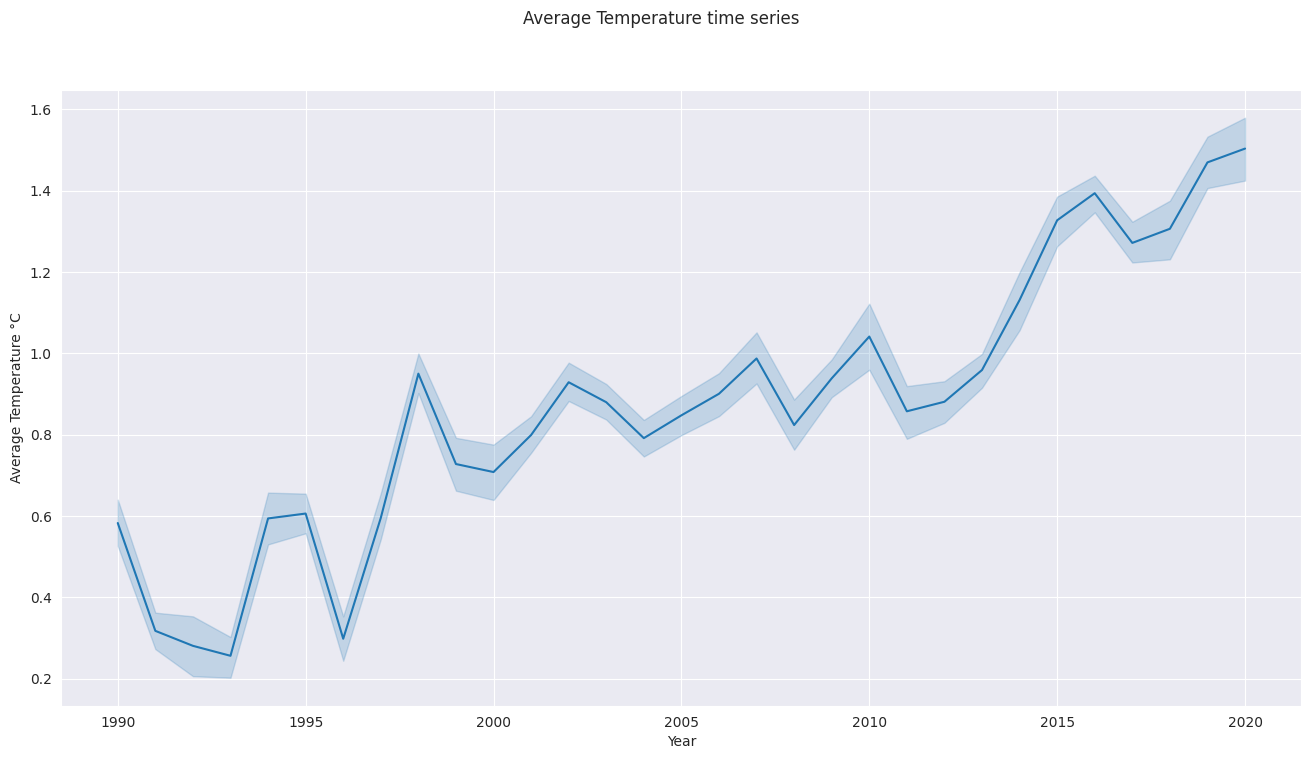

In [15]:
sns.set_style("darkgrid") #set the style of your preference
fig, ax =plt.subplots(figsize = (16,8)) #set figure and axes
sns.lineplot(data = df, x = 'Year', y = 'Average Temperature °C', ax = ax) #plot a lineplot with Year in the x-axis and the average temperature in the y-axis
fig.suptitle('Average Temperature time series') #choose a title

Since 1990, the average land temperature line, compared to pre-industrial times, showcases an upward trend, hitting an all time high of approximately 1.5°C in 2020. The Paris Agreement seeks to maintain global surface temperature increase to no more than 2 °C warming, and possibly to below 1.5 °C, above pre-industrial levels. Hence, this is quite alarming.

let's explore the relaitonship among the target varibale (temperature), the average annual CO2 emission and the Urban population. We can do this in a line-chart, where the x-axis is the year and the y-axis are the standardized values for all of those variables.

In [16]:
#If the values are not standardized, we won't be able to plot the lines in the same graph, as the scales will be totally different.
from sklearn.preprocessing import MinMaxScaler # Import min-max scaler. This will transform all the variable to take values between 0 and 1.

scaler = MinMaxScaler() #let's instantiate it.

temp_emission = df.groupby("Year").agg({"Average Temperature °C": "mean", "total_emission": "mean", 'Urban population': 'mean'}) # let's calculate
                                                                                                                                #the mean emission,
                                                                                                                                #population and temperature per year
norm_emission= scaler.fit_transform(temp_emission) #Here I transform the mean values using the scaler.

temp_df = pd.DataFrame(norm_emission, columns = ['Standardized Avg Temperature','Standardized Mean CO2 emission', 'Standardized Mean Urban Population']) #because the scaler outputs
                                                                                                                                                    ##Nparrays, let's create a df.
temp_df.index = [i for i in range(1990, 2021)] # the data were grouped by year and hence, we can use the year as index. The starting year is 1990 and the end year 2020

[]

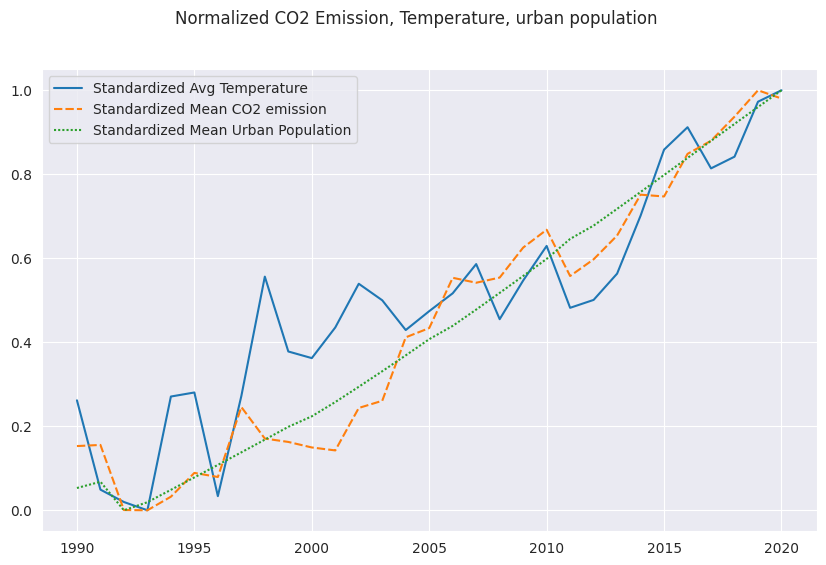

In [17]:
fig, ax = plt.subplots(figsize = (10,6)) # Let's set our figure and axes

g = sns.lineplot(temp_df, ax = ax) #Use seaborn because its looking cool
fig.suptitle('Normalized CO2 Emission, Temperature, urban population')
plt.plot() # and plot

It is clear that CO2 emission, mean urban population and average temperature go hand in hand. All three lines show a strong upward trend.

Now, let's generate a scatterplot of mean CO2 emissions vs Avg. Temperature.

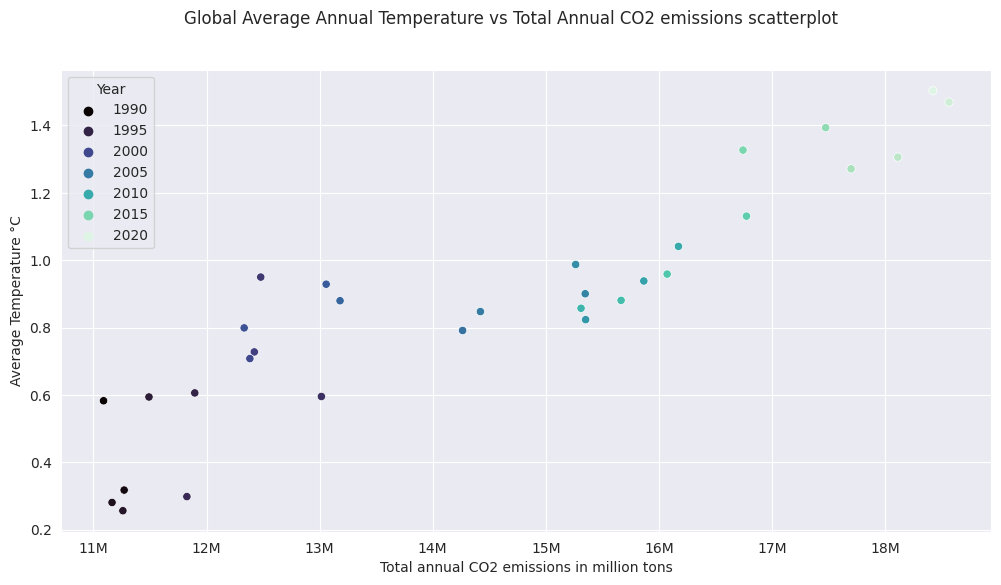

In [18]:
from matplotlib.ticker import FuncFormatter # We gonna use this to convert a big number to millions

temp = df.iloc[:,  1:].groupby('Year').agg({'Average Temperature °C':'mean', 'total_emission':'sum'} ) #Let's group by year and calculate mean annual temperature
                                                                                                       ## and total annual emissions for all countries cummulatively.
fig, ax = plt.subplots(figsize = (12, 6))
g = sns.scatterplot(data = temp, x = 'total_emission', y = 'Average Temperature °C', ax = ax, hue ='Year', palette = "mako")

def millions_formatter(x, pos):  # Let's define a function that takes a number divides it by 1000000 and returns it in millions.
    return '{:,.0f}M'.format(x / 1000000)

# Apply the formatter to the x-axis ticks
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

fig.suptitle('Global Average Annual Temperature vs Total Annual CO2 emissions scatterplot')
ax.set_xlabel('Total annual CO2 emissions in million tons')
plt.show()

There seems to be a somewhat linear relationship between these two variables. As CO2 emissions increase, average temperature also increases. Additionally, both the CO2 emissions and the average temperature increase through time.

Now let's see which activity produces the highest CO2 emissions.

In [19]:
temp = df.iloc[:, 2: -7].copy() # Do not include the first and second column as it is area and year
delete_list = ['Forestland', 'Net Forest conversion', 'On-farm Electricity Use'] #rule out all non-relevant features
temp = temp.drop(delete_list, axis = 1)
means = temp.mean()#calculate the mean anual values for each feature
means.sort_values(ascending = False, inplace = True) #sort them in descending order
cols = means.index #the column names are the indices

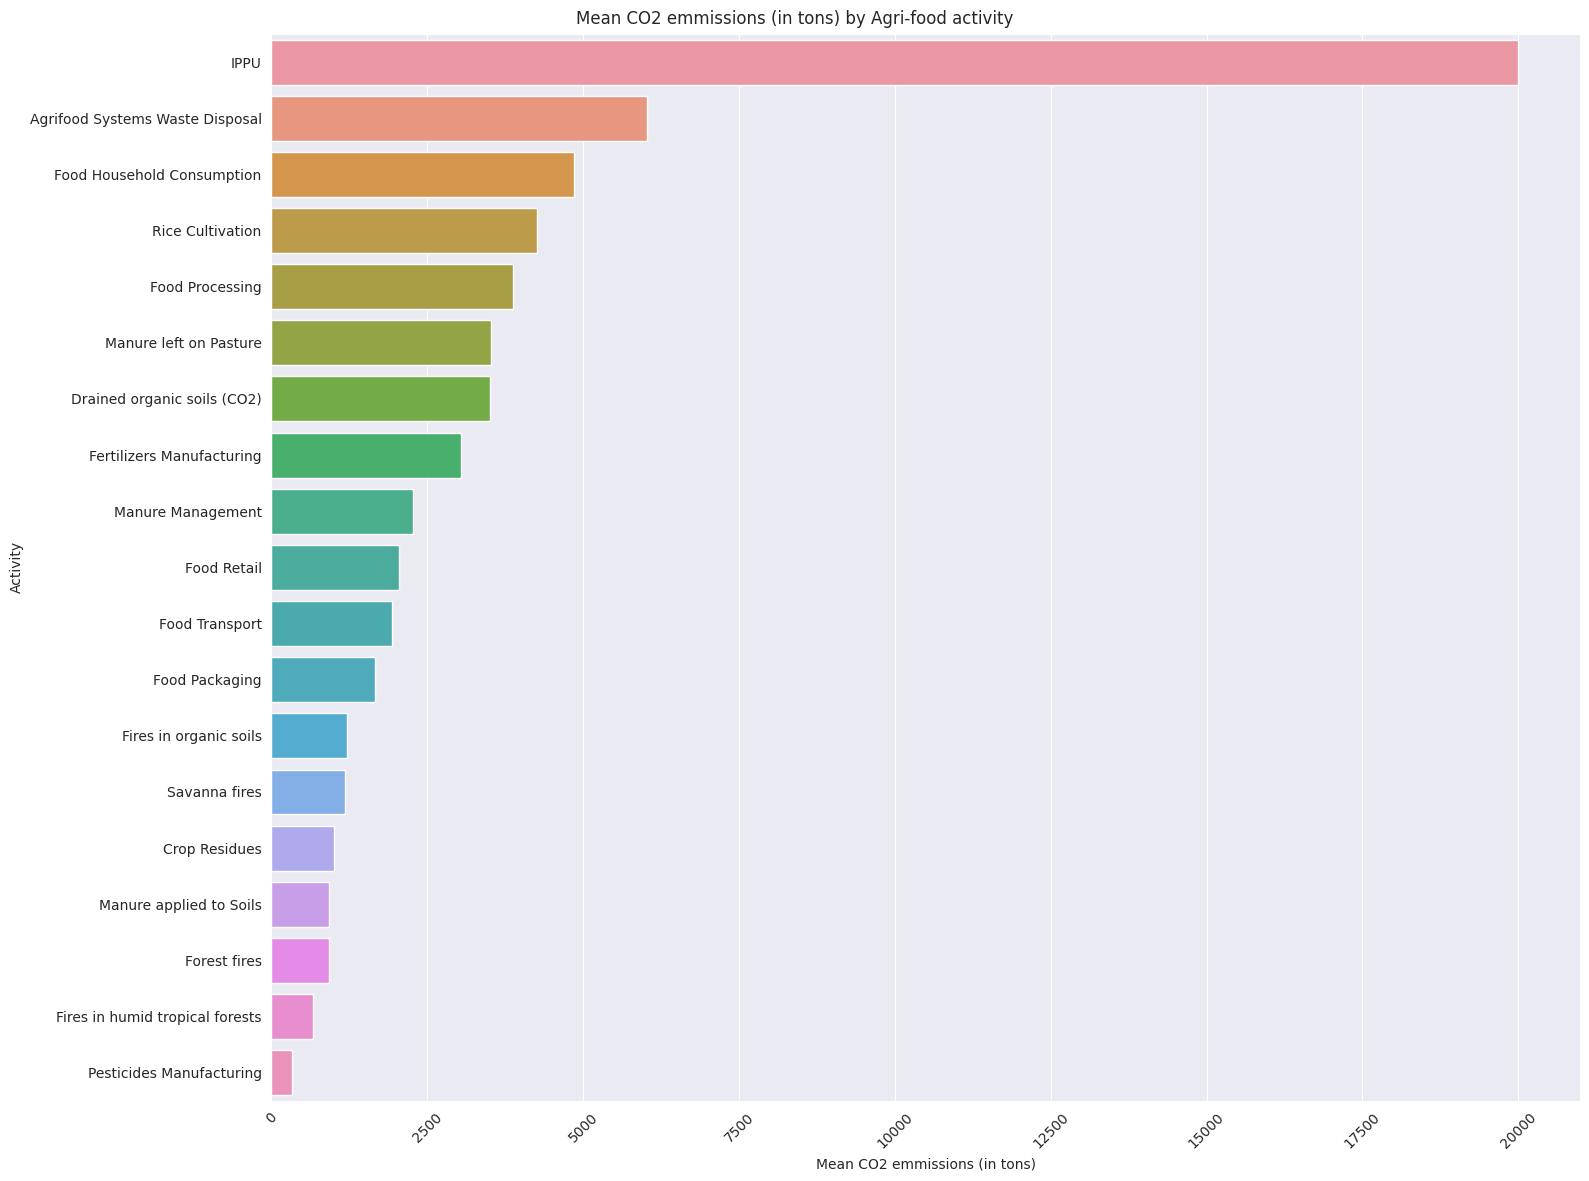

In [20]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.barplot(x=means, y=cols, ax=ax) #wrap x and y parameters

ax.set_ylabel("Activity")  # Set the y-axis label
ax.set_xlabel("Mean CO2 emmissions (in tons)")     # Set the x-axis label
fig.suptitle('Mean CO2 emmissions (in tons) by Agri-food activity')

plt.xticks(rotation=45)      # Rotate x-axis labels for better visibility
plt.tight_layout()           # Adjust layout to prevent labels from getting cut off
plt.show()

It is eminent that IPPU is by far the acctivity with the most CO2 emissions, followed by emissions coming from waste disposal and agrifood products consumption. Thereafter, other industrial and cultivation activities follow, with fire emissions coming towards the end. It should be noted however that some activities are for similar purposes and perhaps they should be grouped together in order to reach to a more hollistic picture of the situation. For example, packaging, IPPU, fertilizers manufacturing etc, are activities pertaining to the industrial processes. On the other hand, savanna fires, forest fires, fires in organic soils and fires in humid tropical forests, are emissions derriving from fires. Aditionally, emissions coming from manure and manure processes, along with rice cultivation emissions etc, could also be grouped together as they pertain to cultivation emissions. Grouping variables together on this basis can lead to a clearer understanding of the emissions. Hence, there will be 5 categories: industrial emissions, cultivation emissions, waste disposal emissions, consumption emissions, and fire emissions, as seen bellow.

In [21]:
# Select relevant columns
selected_columns = ['Area', 'total_emission', 'Agrifood Systems Waste Disposal', 'Food Household Consumption',
                    'Forest fires', 'Fires in humid tropical forests', 'Savanna fires',
                    'IPPU', 'Food Processing', 'Food Transport', 'Food Packaging', 'Pesticides Manufacturing',
                    'Fertilizers Manufacturing', 'Food Retail',
                    'Rice Cultivation', 'Manure left on Pasture', 'Drained organic soils (CO2)',
                    'Crop Residues', 'Manure Management', 'Manure applied to Soils', 'Average Temperature °C', 'Year']

# Create a simplified DataFrame with selected columns
temp2 = df[selected_columns].copy()

# Calculate the categories total values
emission_sources = ['Forest fires', 'Fires in humid tropical forests', 'Savanna fires',
                    'IPPU', 'Food Processing', 'Food Transport', 'Food Packaging', 'Pesticides Manufacturing',
                    'Fertilizers Manufacturing', 'Food Retail',
                    'Rice Cultivation', 'Manure left on Pasture', 'Drained organic soils (CO2)',
                    'Crop Residues', 'Manure Management', 'Manure applied to Soils']

temp2['total_fire_emissions'] = temp2[emission_sources[:3]].sum(axis=1)
temp2['total_industrial_emissions'] = temp2[emission_sources[3:12]].sum(axis=1)
temp2['total_cultivation_emissions'] = temp2[emission_sources[12:]].sum(axis=1)


# Calculate mean values for all emission sources
means = temp2[['total_fire_emissions', 'total_industrial_emissions', 'total_cultivation_emissions',
               'Agrifood Systems Waste Disposal', 'Food Household Consumption']].mean()

means.rename({'total_fire_emissions' : 'mean_fire_emissions', 'total_industrial_emissions' : 'mean_industrial_emissions',
                       'total_cultivation_emissions' : 'mean_cultivation_emissions',
                       'Agrifood Systems Waste Disposal' :  'mean Agrifood Systems Waste Disposal',
                       'Food Household Consumption' : 'mean Food Household Consumption'})


# Sort columns based on mean values in descending order
means.sort_values(ascending=False, inplace = True)

cols = means.index

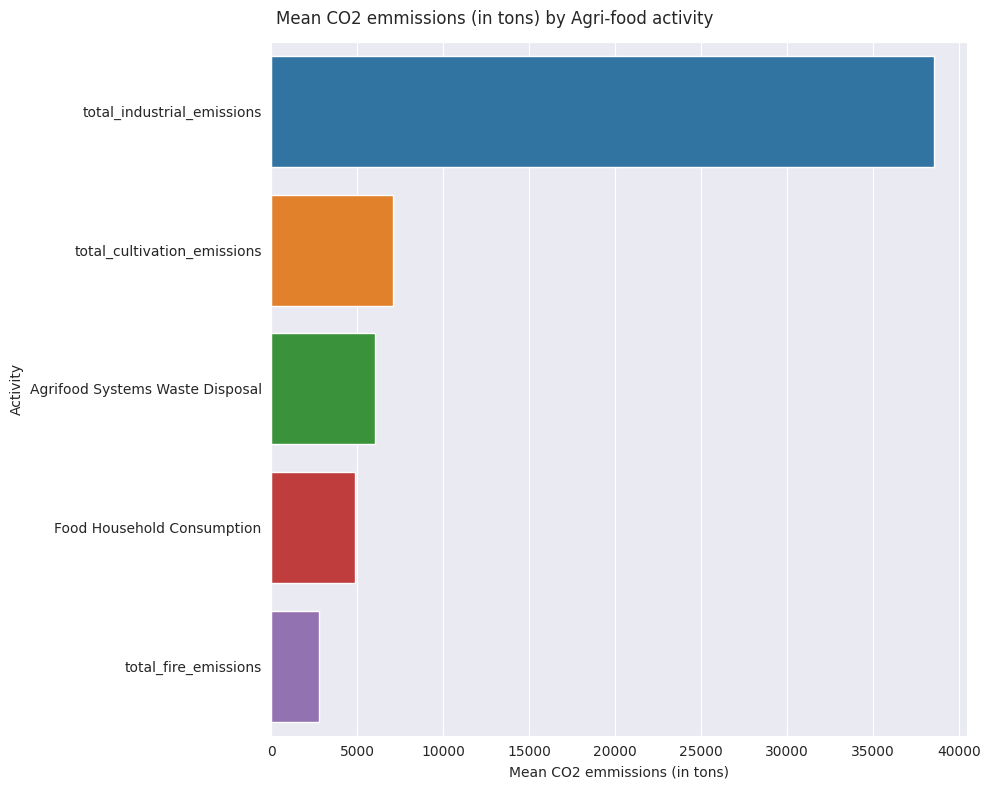

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=means, y=cols, ax=ax) #wrap x and y parameters

ax.set_ylabel("Activity")  # Set the y-axis label
ax.set_xlabel("Mean CO2 emmissions (in tons)")     # Set the x-axis label
fig.suptitle('Mean CO2 emmissions (in tons) by Agri-food activity')

plt.tight_layout()           # Adjust layout to prevent labels from getting cut off
plt.show() #

It is eminent from the bar chart above that industrial activities emit the biggest proportion of CO2, followed by cultivation emissions (as opposed to waste disposal emissions), which in turn are followed by waste disposal emissions, consumption emissions, and fire emissions.

Now, it should be interesting to explore how those 5 groups of CO2-emitting activities are associated to different countries, along of course, with the total emissions and average temperature. We can explore this, with a few map graphs.

In [23]:
#We will need to retrive the list of countries and their info so we can correct country name mistakes in the original dataset.
##If not, we won't be able to match some countries in the dataset with the pycountry's list.
list(pycountry.countries)

[Country(alpha_2='AW', alpha_3='ABW', flag='🇦🇼', name='Aruba', numeric='533'),
 Country(alpha_2='AF', alpha_3='AFG', flag='🇦🇫', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan'),
 Country(alpha_2='AO', alpha_3='AGO', flag='🇦🇴', name='Angola', numeric='024', official_name='Republic of Angola'),
 Country(alpha_2='AI', alpha_3='AIA', flag='🇦🇮', name='Anguilla', numeric='660'),
 Country(alpha_2='AX', alpha_3='ALA', flag='🇦🇽', name='Åland Islands', numeric='248'),
 Country(alpha_2='AL', alpha_3='ALB', flag='🇦🇱', name='Albania', numeric='008', official_name='Republic of Albania'),
 Country(alpha_2='AD', alpha_3='AND', flag='🇦🇩', name='Andorra', numeric='020', official_name='Principality of Andorra'),
 Country(alpha_2='AE', alpha_3='ARE', flag='🇦🇪', name='United Arab Emirates', numeric='784'),
 Country(alpha_2='AR', alpha_3='ARG', flag='🇦🇷', name='Argentina', numeric='032', official_name='Argentine Republic'),
 Country(alpha_2='AM', alpha_3='ARM', flag='🇦🇲', 

In [24]:
#Let's also get the list of countries in the df.
list(temp2['Area'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belgium-Luxembourg',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, mainland',
 'China, Taiwan Province of',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Czechoslovakia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'D

In [25]:
#Let's fix all the issues with country names
temp2['Area'].replace({'United States of America': 'United States'}, inplace=True)

In [26]:
temp2['Area'].replace({'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'}, inplace=True)

In [27]:
temp2['Area'].replace({'Democratic Republic of the Congo': 'Congo, The Democratic Republic of the'}, inplace=True)

In [28]:
temp2['Area'].replace({'Bolivia (Plurinational State of)': 'Bolivia, Plurinational State of'}, inplace=True)

In [29]:
temp2['Area'].replace({'Venezuela (Bolivarian Republic of)': 'Venezuela, Bolivarian Republic of'}, inplace=True)

In [30]:
temp2['Area'].replace({'United Republic of Tanzania': 'Tanzania, United Republic of'}, inplace=True)

In [31]:
temp2['Area'].replace({'Iran (Islamic Republic of)': 'Iran, Islamic Republic of'}, inplace=True)

In [32]:
temp2['Area'].replace({"Democratic People's Republic of Korea": "Korea, Democratic People's Republic of"}, inplace=True)

In [33]:
#Done.
temp2['Area'].replace({"Republic of Korea": "Korea, Republic of"}, inplace=True)

In [34]:
# Create a function to retrieve ISO alpha codes
def get_iso_alpha(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        iso_alpha = country.alpha_3
        return iso_alpha
    except:
        return None

# Create the dataset
CO2_df = temp2[['Area', 'total_emission', 'Average Temperature °C']]
mean_CO2_df = CO2_df.groupby('Area').mean()

# Normalize the emissions
scaler = MinMaxScaler()  # Initialize the scaler
mean_CO2 = scaler.fit_transform(mean_CO2_df)
normalized_emission = pd.DataFrame(mean_CO2, columns=['mean_CO2_emission', 'Average Temperature °C'], index=mean_CO2_df.index)
normalized_emission['Area'] = normalized_emission.index
normalized_emission['iso_alpha'] = normalized_emission['Area'].apply(get_iso_alpha)


normalized_emission['Average_temperature'] = normalized_emission['Average Temperature °C'].fillna(0)


# Create the choropleth map
fig = px.choropleth(
    normalized_emission,
    locations="iso_alpha",
    color="Average_temperature",
    hover_name="Area",
    color_continuous_scale=[ "blue", "green",
                            "yellow", "orange",
                            "red"]
)

# Create the scatter_geo plot
fig2 = px.scatter_geo(
    normalized_emission,
    locations="iso_alpha",
    size="mean_CO2_emission"
)

# Add the scatter_geo data to the choropleth map
fig.add_trace(fig2.data[0])

# Update the layout
fig.update_layout(
    title={'text': "Mean Agrifood CO2 emissions and mean temperature increase by country", 'x': 0.5, 'xanchor': 'center'},
    autosize=False,
    height=600,
    width=1200
)

# Show the figure
fig.show()


It seems like average temperature increase is not directly related to CO2 emissions, as Russia for example the has no carbon footprint, has sustained the highest temperature rise since pre-industrial times. Contrary, the US, India, Indonesia and China that have a high carbon footprint, have seen a moderate temperature increase. Europe, overall, seems to have quite a few countries, such as Finland and Serbia with high rise in temperatures, while most of the countries have presented moderate temperature rise. South African countries, also present quite low temperature rise along with most south American countries, except of Brazil that showcases a moderate increase in average temperature. Overall, this might be explained by the fact that, other industrial processes emissions, outside the agrifood sector might have contributed in temperature increase in different areas. Aditionally, local temperature rises might be driven by different factors, such as meteorological and atmospheric conditions, and hence, CO2 emissions in one Area may affect the land temperature in other areas, based on each location's meteorological idiosyncrasy.  

Text(0.5, 0.98, 'Average temperature increase per region')

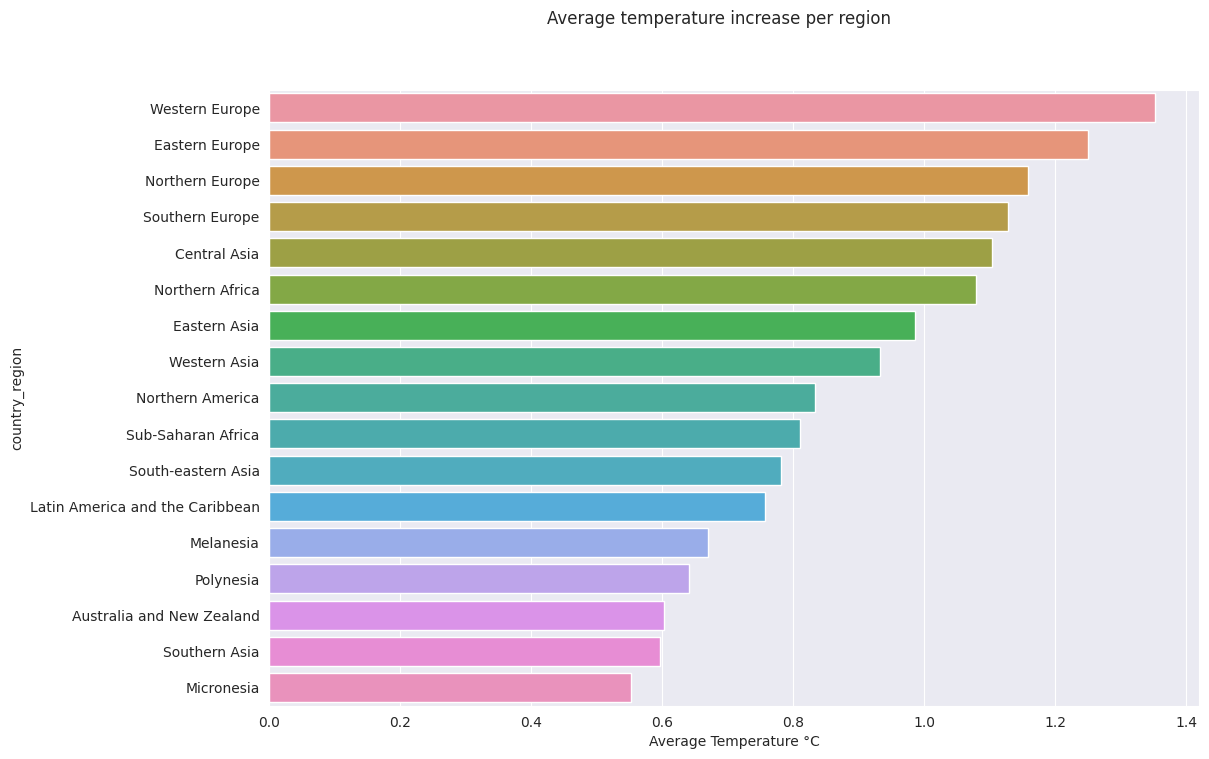

In [35]:
url = 'https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/raw/master/all/all.csv'
regions = pd.read_csv(url)

def get_region_by_country(country_name):
    # Find the region for the given country name
    try:
        country_region = regions[regions['name'] == country_name]['sub-region'].iloc[0]
        return country_region
    except:
        return None

temp2['country_region'] = temp2['Area'].apply(get_region_by_country)
temp3 = temp2[['country_region','Average Temperature °C', 'total_emission']].groupby('country_region').mean()
temp3['country_region'] = temp3.index

fig, ax = plt.subplots(figsize = (12, 8))
temp3.sort_values(by = 'Average Temperature °C', ascending = False, inplace = True)
sns.barplot(data = temp3, y = 'country_region', x = 'Average Temperature °C', ax = ax)

fig.suptitle('Average temperature increase per region')

It seems like Europe has sustained the highest temperature increase, while Asia, comes second, even though, Asia has produced the largest CO2 emissions.

Text(0.5, 0.98, 'Emissions per region')

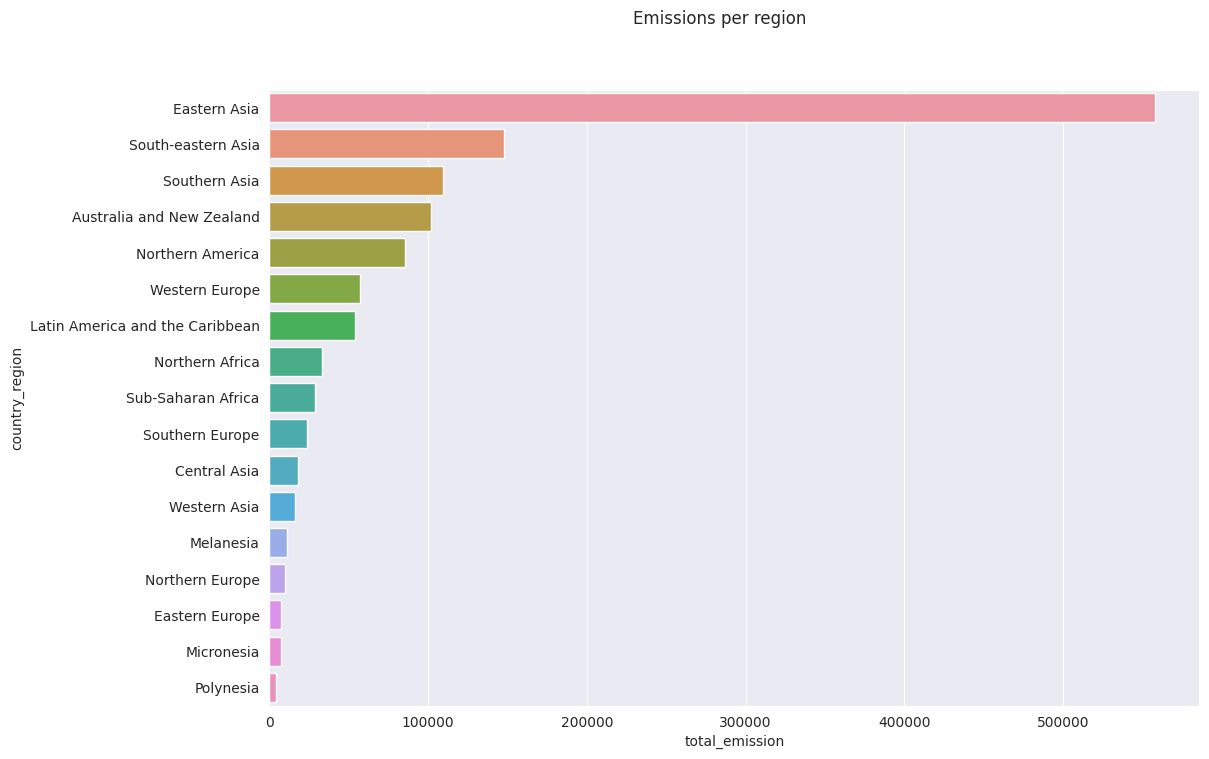

In [36]:
fig, ax = plt.subplots(figsize = (12, 8))
temp3.sort_values(by = 'total_emission', ascending = False, inplace = True)
sns.barplot(data = temp3, y = 'country_region', x = 'total_emission', ax = ax)
fig.suptitle('Emissions per region')

Now, let's plot each country's mean total emissions (defined by the filling color of each country), and each country's mean industrial emissions (defined by the size of the circle). This will help us understand which are the sources of each country's emissions.

In [37]:
# Create a function to retrieve ISO alpha codes
def get_iso_alpha(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        iso_alpha = country.alpha_3
        return iso_alpha
    except:
        return None

# Create the dataset
CO2_df = temp2[['Area', 'total_emission', 'total_industrial_emissions']]
mean_CO2_df = CO2_df.groupby('Area').mean()

# Normalize the emissions
scaler = MinMaxScaler()  # Initialize the scaler
mean_CO2 = scaler.fit_transform(mean_CO2_df)
normalized_emission = pd.DataFrame(mean_CO2, columns=['mean_CO2_emission', 'mean_industrial_emissions'], index=mean_CO2_df.index)
normalized_emission['Area'] = normalized_emission.index
normalized_emission['iso_alpha'] = normalized_emission['Area'].apply(get_iso_alpha)


normalized_emission['mean_industrial_emissions'] = normalized_emission['mean_industrial_emissions'].fillna(0)


# Create the choropleth map
fig = px.choropleth(
    normalized_emission,
    locations="iso_alpha",
    color="mean_CO2_emission",
    hover_name="Area",
    color_continuous_scale=[ "blue", "green",
                            "yellow", "orange",
                            "red"]
)

# Create the scatter_geo plot
fig2 = px.scatter_geo(
    normalized_emission,
    locations="iso_alpha",
    size="mean_industrial_emissions"
)

# Add the scatter_geo data to the choropleth map
fig.add_trace(fig2.data[0])

# Update the layout
fig.update_layout(
    title={'text': "Mean Agrifood CO2 emissions and mean industrial emissions by country", 'x': 0.5, 'xanchor': 'center'},
    autosize=False,
    height=600,
    width=1200
)

# Show the figure
fig.show()




As we can see from the choropleth above China produces the highest CO2 emissions along with the highest Industrial emissions. Second comes Brazil in terms of mean CO2 emission. Despite that, however, industrial emissions are relatively small. Indonesia is the 3rd in the CO2 emissions rank, with also relatively little industrial emissions. The US follow, with relatively high mean CO2 emissions and Iindustrial emissions(second highest). India and Congo also showcase quite high CO2 emissions, with India having also relatively high industrial emissions. Russia has negative mean CO2 emissions. That may occur due to activities that sequester CO2 such as afforestation, reforestation or other Carbon capturing activities. Overall, CO2 emissions produced by highly industrial countries such as China, India and the US may be a result of industrial processes, while the activities sourrounding actually producing foods may increase the CO2 footprint in countries such as Bazil and Indonesia. Overall, it seems like that European and African countries emit the lowest proportion of CO2, whilst North America, some South American countries, and some Asian countries the highest.

Let's see now how waste disposal is related to total CO2 emissions.

In [38]:
# Create a function to retrieve ISO alpha codes
def get_iso_alpha(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        iso_alpha = country.alpha_3
        return iso_alpha
    except:
        return None

# Create the dataset
CO2_df = temp2[['Area', 'total_emission', 'Agrifood Systems Waste Disposal']]
mean_CO2_df = CO2_df.groupby('Area').mean()

# Normalize the emissions
scaler = MinMaxScaler()  # Initialize the scaler
mean_CO2 = scaler.fit_transform(mean_CO2_df)
normalized_emission = pd.DataFrame(mean_CO2, columns=['mean_CO2_emission', 'mean_waste_emission'], index=mean_CO2_df.index)
normalized_emission['Area'] = normalized_emission.index
normalized_emission['iso_alpha'] = normalized_emission['Area'].apply(get_iso_alpha)


normalized_emission['mean_waste_emission'] = normalized_emission['mean_waste_emission'].fillna(0)


# Create the choropleth map
fig = px.choropleth(
    normalized_emission,
    locations="iso_alpha",
    color="mean_CO2_emission",
    hover_name="Area",
    color_continuous_scale=[ "blue", "green",
                            "yellow", "orange",
                            "red"]
)

# Create the scatter_geo plot
fig2 = px.scatter_geo(
    normalized_emission,
    locations="iso_alpha",
    size="mean_waste_emission"
)

# Add the scatter_geo data to the choropleth map
fig.add_trace(fig2.data[0])

# Update the layout
fig.update_layout(
    title={'text': "Mean Agrifood CO2 emissions and agrifood waste disposal emissions by country", 'x': 0.5, 'xanchor': 'center'},
    autosize=False,
    height=600,
    width=1200
)

# Show the figure
fig.show()




It seems like agrifood systems waste disposal, is highly related to Industrial emissions, with industrial countries emiting high quantities of CO2 deriving from waste disposal.

In [39]:
# Create a function to retrieve ISO alpha codes
def get_iso_alpha(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        iso_alpha = country.alpha_3
        return iso_alpha
    except:
        return None

# Create the dataset
CO2_df = temp2[['Area', 'total_emission', 'total_cultivation_emissions']]
mean_CO2_df = CO2_df.groupby('Area').mean()

# Normalize the emissions
scaler = MinMaxScaler()  # Initialize the scaler
mean_CO2 = scaler.fit_transform(mean_CO2_df)
normalized_emission = pd.DataFrame(mean_CO2, columns=['mean_CO2_emission', 'mean_cultivation_emissions'], index=mean_CO2_df.index)
normalized_emission['Area'] = normalized_emission.index
normalized_emission['iso_alpha'] = normalized_emission['Area'].apply(get_iso_alpha)


normalized_emission['mean_cultivation_emissions'] = normalized_emission['mean_cultivation_emissions'].fillna(0)


# Create the choropleth map
fig = px.choropleth(
    normalized_emission,
    locations="iso_alpha",
    color="mean_CO2_emission",
    hover_name="Area",
    color_continuous_scale=[ "blue", "green",
                            "yellow", "orange",
                            "red"]
)

# Create the scatter_geo plot
fig2 = px.scatter_geo(
    normalized_emission,
    locations="iso_alpha",
    size="mean_cultivation_emissions"
)

# Add the scatter_geo data to the choropleth map
fig.add_trace(fig2.data[0])

# Update the layout
fig.update_layout(
    title={'text': "Mean Agrifood CO2 emissions and mean cultivation emissions by country", 'x': 0.5, 'xanchor': 'center'},
    autosize=False,
    height=600,
    width=1200
)

# Show the figure
fig.show()




Now we can see that Brazil and India have larrge CO2 emissions coming from cultivation activities, and thus, explaining the high total emission levels. China is the country producing the highest cultivation emissions and the US is also on the top of the list.

In [40]:
# Create a function to retrieve ISO alpha codes
def get_iso_alpha(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        iso_alpha = country.alpha_3
        return iso_alpha
    except:
        return None

# Create the dataset
CO2_df = temp2[['Area', 'total_emission', 'total_fire_emissions']]
mean_CO2_df = CO2_df.groupby('Area').mean()

# Normalize the emissions
scaler = MinMaxScaler()  # Initialize the scaler
mean_CO2 = scaler.fit_transform(mean_CO2_df)
normalized_emission = pd.DataFrame(mean_CO2, columns=['mean_CO2_emission', 'mean_fire_emissions'], index=mean_CO2_df.index)
normalized_emission['Area'] = normalized_emission.index
normalized_emission['iso_alpha'] = normalized_emission['Area'].apply(get_iso_alpha)


normalized_emission['mean_fire_emissions'] = normalized_emission['mean_fire_emissions'].fillna(0)


# Create the choropleth map
fig = px.choropleth(
    normalized_emission,
    locations="iso_alpha",
    color="mean_CO2_emission",
    hover_name="Area",
    color_continuous_scale=[ "blue", "green",
                            "yellow", "orange",
                            "red"]
)

# Create the scatter_geo plot
fig2 = px.scatter_geo(
    normalized_emission,
    locations="iso_alpha",
    size="mean_fire_emissions"
)

# Add the scatter_geo data to the choropleth map
fig.add_trace(fig2.data[0])

# Update the layout
fig.update_layout(
    title={'text': "Mean Agrifood CO2 emissions and mean fire emissions by country", 'x': 0.5, 'xanchor': 'center'},
    autosize=False,
    height=600,
    width=1200
)

# Show the figure
fig.show()




Congo's biggest part of total emissions seems to be coming from fires. In general, most fire emissions are emited in Central Africa, Australia, Brazil, Bolivia and some Areas in south-east Asia.

In [41]:
# Create a function to retrieve ISO alpha codes
def get_iso_alpha(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        iso_alpha = country.alpha_3
        return iso_alpha
    except:
        return None

# Create the dataset
CO2_df = temp2[['Area', 'total_emission', 'Food Household Consumption']]
mean_CO2_df = CO2_df.groupby('Area').mean()

# Normalize the emissions
scaler = MinMaxScaler()  # Initialize the scaler
mean_CO2 = scaler.fit_transform(mean_CO2_df)
normalized_emission = pd.DataFrame(mean_CO2, columns=['mean_CO2_emission', 'mean_household_emission'], index=mean_CO2_df.index)
normalized_emission['Area'] = normalized_emission.index
normalized_emission['iso_alpha'] = normalized_emission['Area'].apply(get_iso_alpha)


normalized_emission['mean_household_emission'] = normalized_emission['mean_household_emission'].fillna(0)


# Create the choropleth map
fig = px.choropleth(
    normalized_emission,
    locations="iso_alpha",
    color="mean_CO2_emission",
    hover_name="Area",
    color_continuous_scale=[ "blue", "green",
                            "yellow", "orange",
                            "red"]
)

# Create the scatter_geo plot
fig2 = px.scatter_geo(
    normalized_emission,
    locations="iso_alpha",
    size="mean_household_emission"
)

# Add the scatter_geo data to the choropleth map
fig.add_trace(fig2.data[0])

# Update the layout
fig.update_layout(
    title={'text': "Mean Agrifood CO2 emissions and household consumption emissions by country", 'x': 0.5, 'xanchor': 'center'},
    autosize=False,
    height=600,
    width=1200
)

# Show the figure
fig.show()


In term of household consumption, China is ranked as no1, with the US following suite with around half of the consumption emissions. It should be noted however that the US has less than one quarter of China's population, and hence the emissions per capita are much higher. Adittionally, India that also has approximately 4 times larger population than the US, showcases lower consumption emissions. For the rest of the countries the consumption emissions are moderate or low.

<ipython-input-42-fb431ae32677>:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



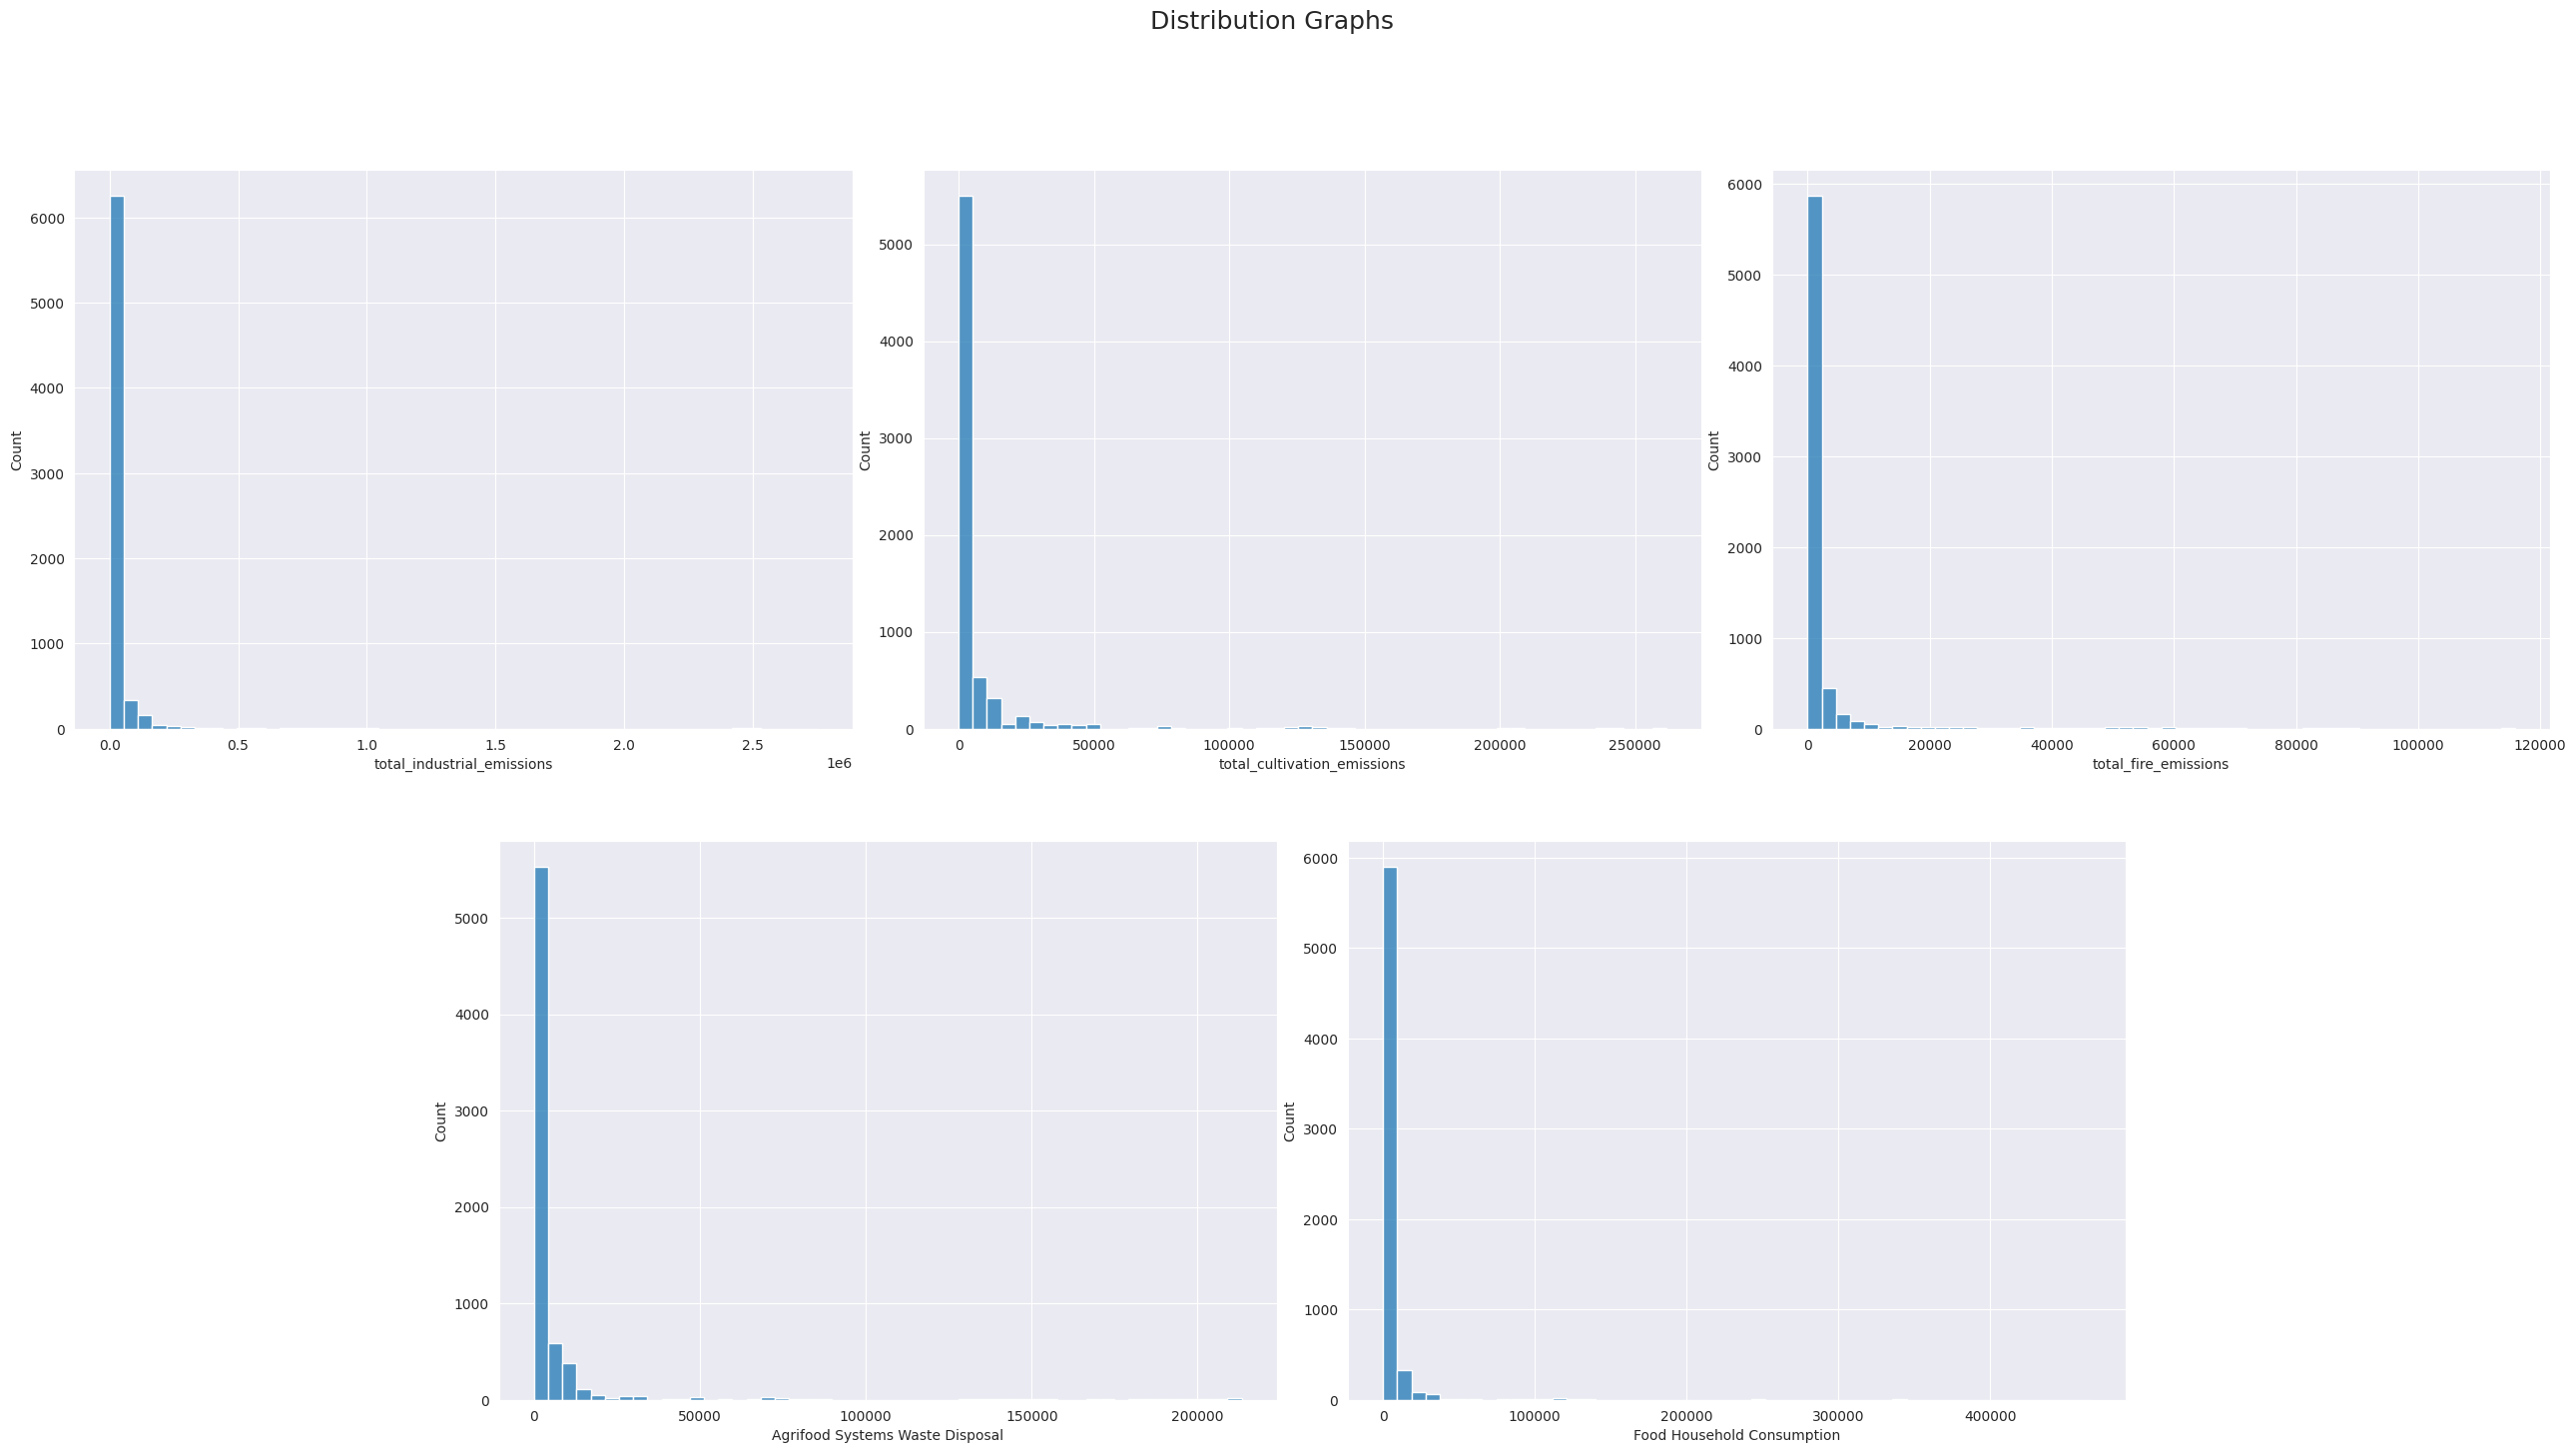

In [42]:
# Let's plot the distribution plots using subplot2grid to adjust the position and seaborn because its cool.

fig, ax = plt.subplots(figsize = (32, 16))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

sns.histplot(data = temp2, x='total_industrial_emissions', ax = ax1, bins = 50)
sns.histplot(data = temp2, x='total_cultivation_emissions', ax = ax2, bins = 50)
sns.histplot(data = temp2, x='total_fire_emissions', ax = ax3, bins = 50)
sns.histplot(data = temp2, x='Agrifood Systems Waste Disposal', ax = ax4, bins = 50)
sns.histplot(data = temp2, x='Food Household Consumption', ax = ax5, bins = 50)

fig.suptitle('Distribution Graphs', fontsize = 18)

plt.show()

It is clear that for all emission categories, the data are negatively skewed. This means that the histograms have a long right tail. The underlying reason for this behavior, might be that the must vajority of countries have a small or moderate agrifood sector and hence the emissions are much lower in comparison to agrifood and industrial giants such as China, the USA or Brazil.


At this point it should be interesting to vizualize the relationship amongst the 5 groups of variables and the target variable via scatterplots.

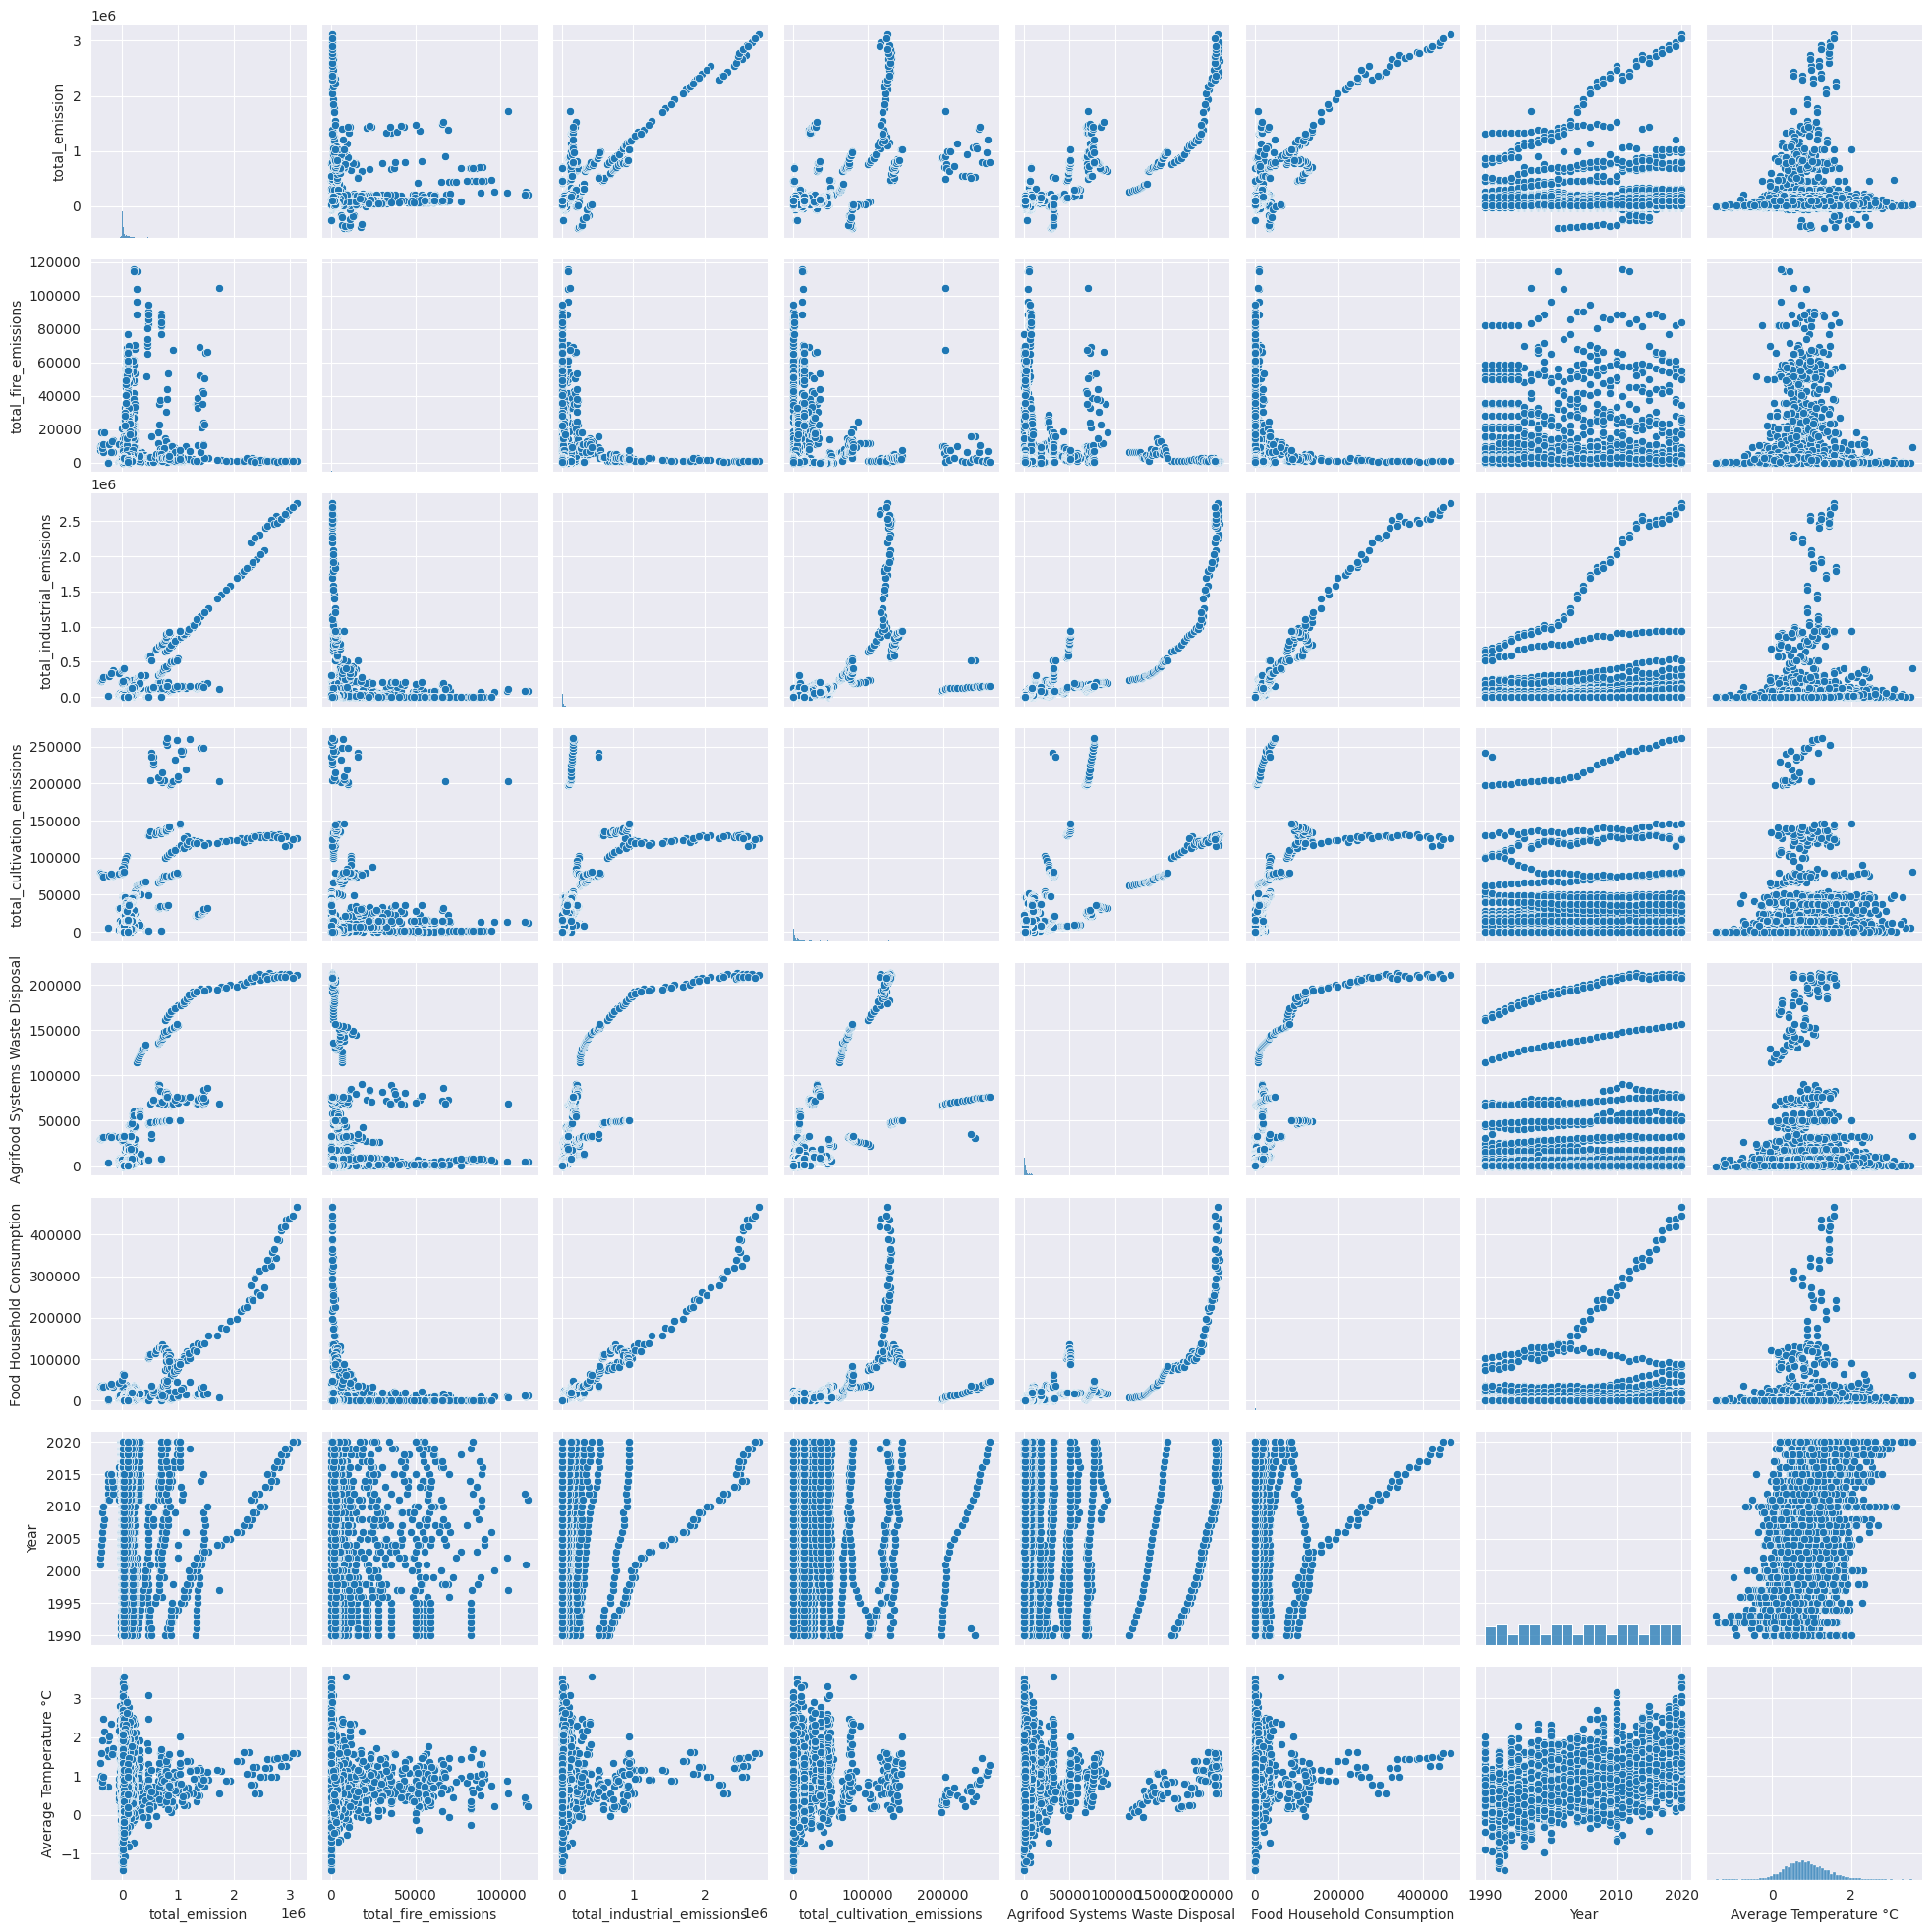

In [43]:
#choose the relevant variables
variables = ['total_emission','total_fire_emissions',
       'total_industrial_emissions', 'total_cultivation_emissions',
       'Agrifood Systems Waste Disposal',
       'Food Household Consumption', 'Year', 'Average Temperature °C' ]

#add them to temp3
temp3 = temp2[variables].copy()

fig.suptitle('Critical variables scatterplot', fontsize = 18)

#plot
sns.pairplot(data = temp3)

Not much to comment here, apart of the fact that we cannot identify any direct relationships between average temperature and most variables. There is some sort of positive relationship between Year and Average temperature. Some of the predictors also showcase a positive relationship. Most notably, total emissions, with industrial emissions, waste emissions and consumption emissions.

<Axes: >

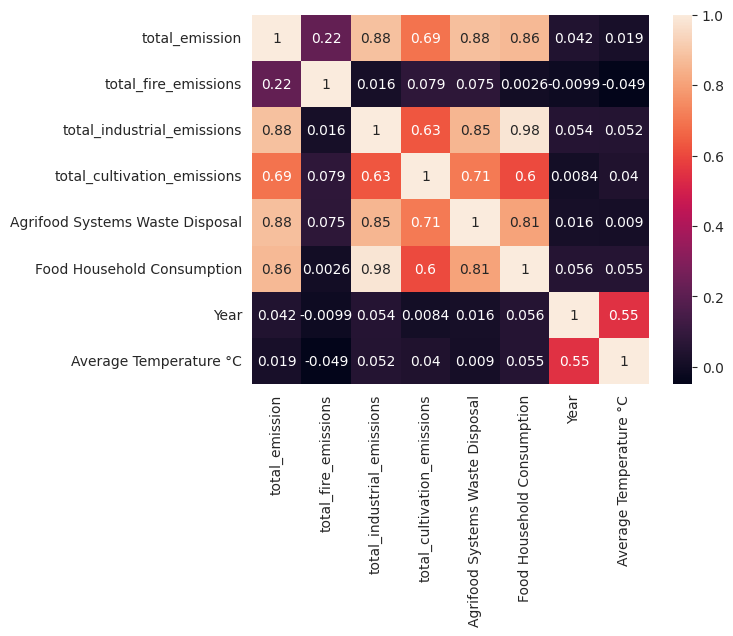

In [44]:
sns.heatmap(data = temp3.corr(), annot = True)

Now, let's generate the scatterplots of the same variables, but aggregated by year.

In [45]:
# Calculate and add Global Temperature mean per year to temp5
temp4 = temp3.copy()
temp4 = temp4.groupby('Year').transform('mean')

Text(0.5, 0.98, 'Critical variables aggregated by year scatterplot')

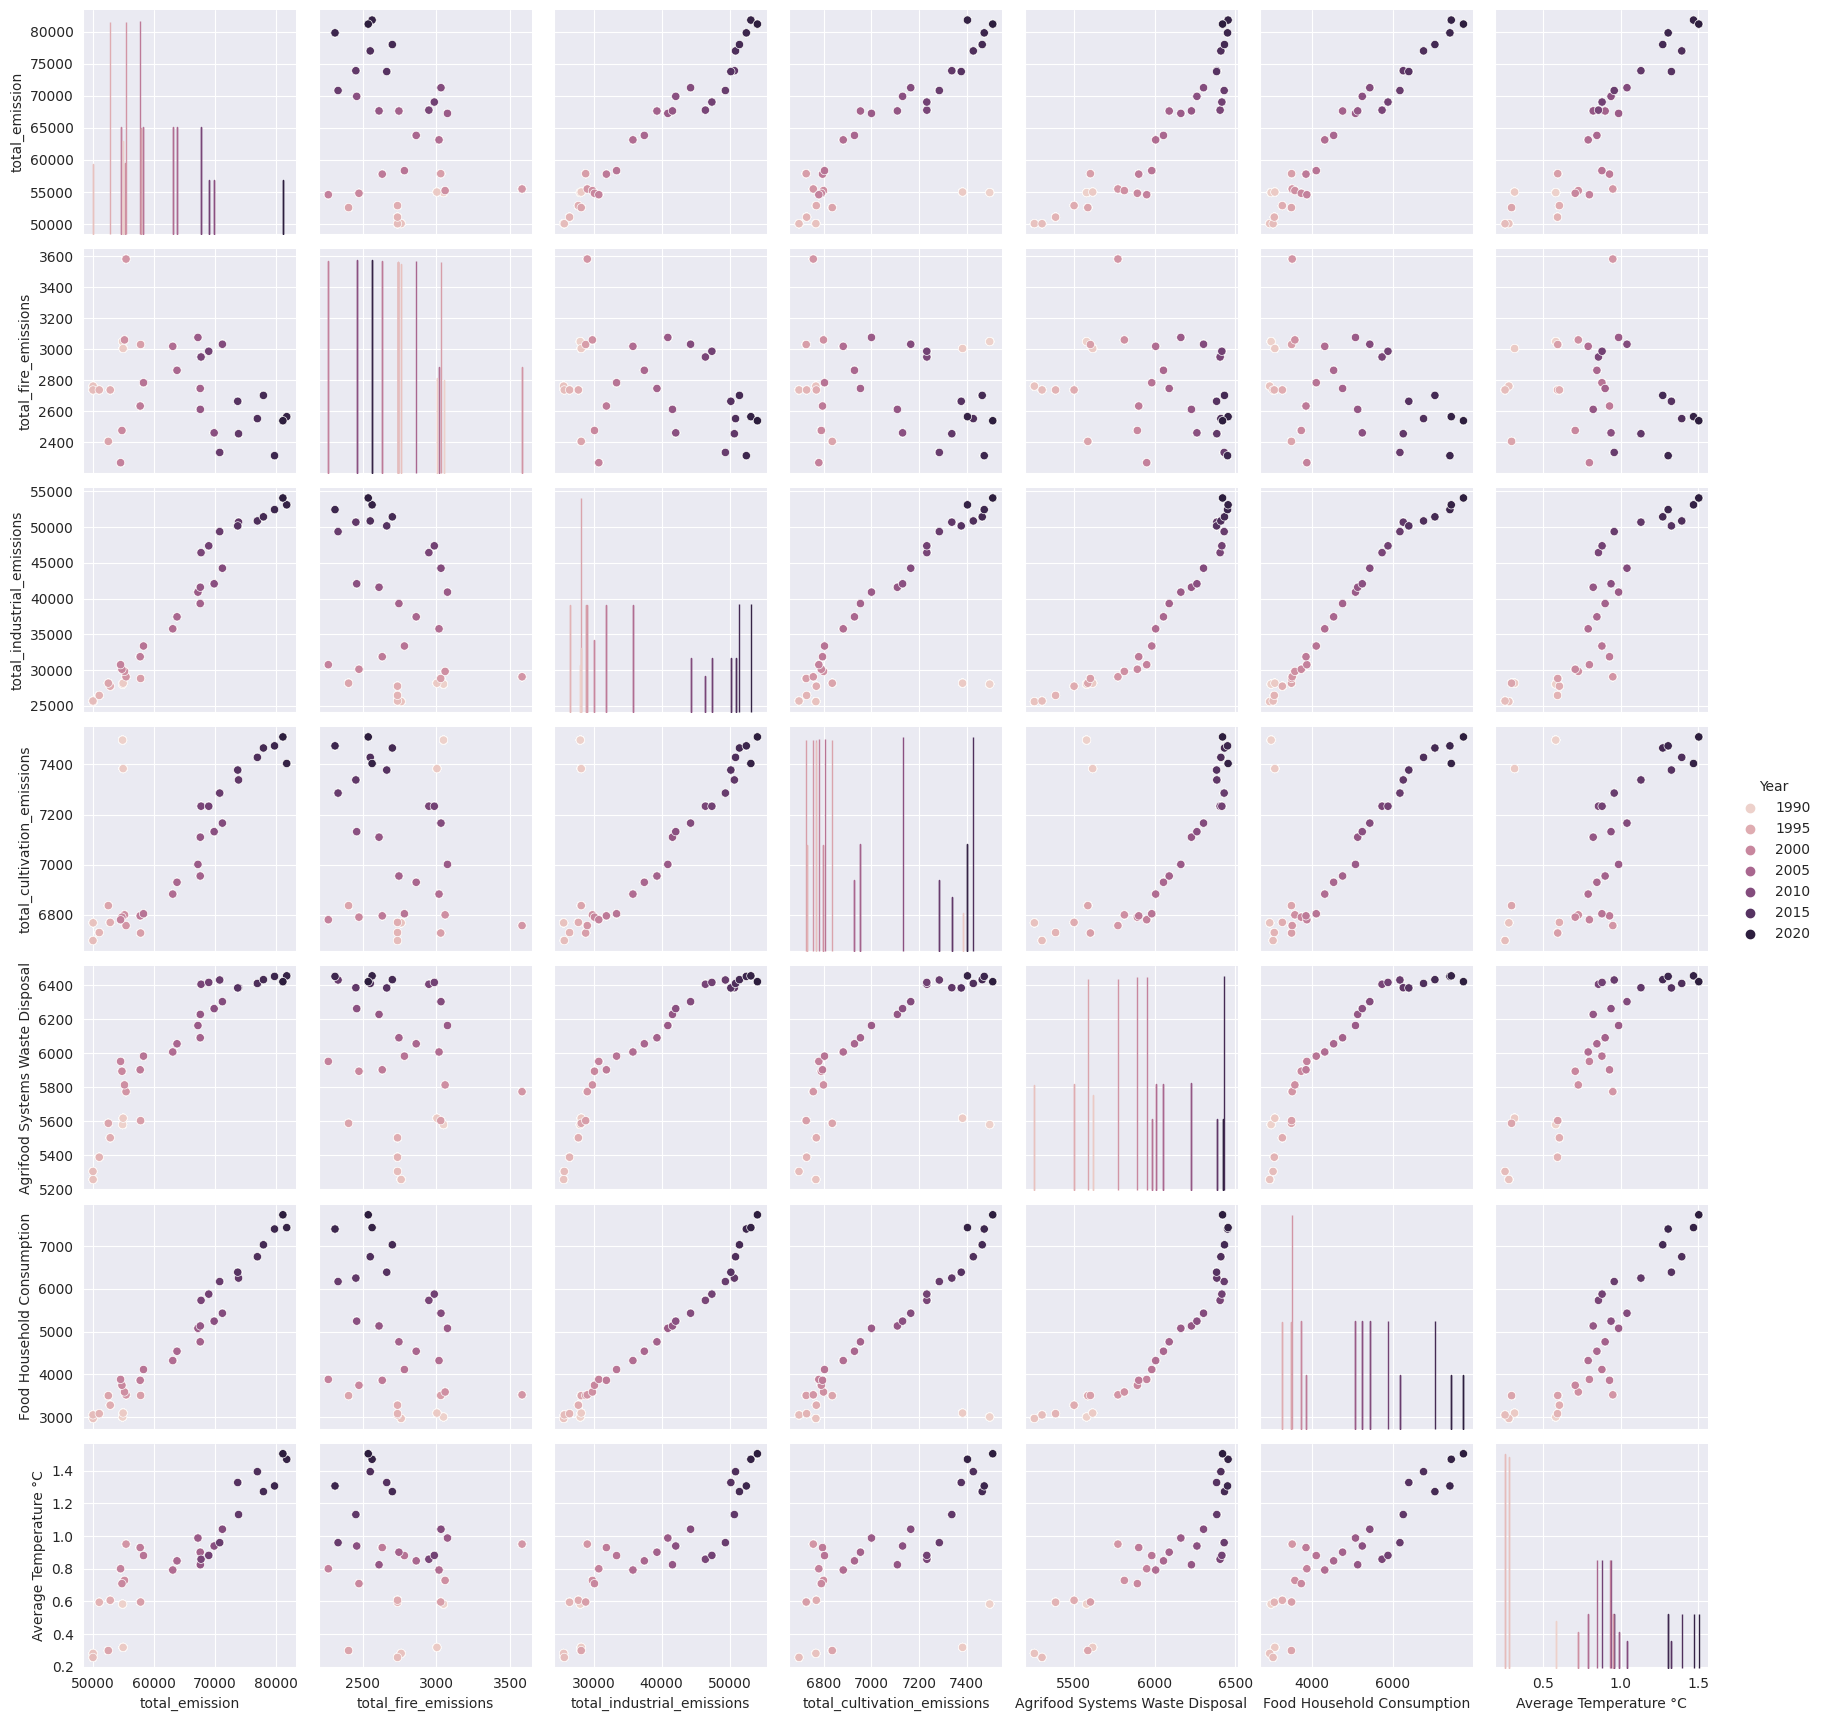

In [46]:
temp4['Year'] = temp3['Year']
sns.pairplot(data = temp4, hue = 'Year')
fig.suptitle('Critical variables aggregated by year scatterplot', fontsize = 18)

The multiple scatterplots figure above illustrates that for most groups of variables (with the exception of mean_fire_emissionis), as the emissions increase, average temperature also increases, through time, almost in a linear trend.This means that overall, every year, there are more CO2 emissions, and the temperature increases. In terms of fire emissions, the emissions do not increase, throughout time. Moreovcer, all variables (except fire emissions), also seem to be related, as the scatterplots suggest positive relationships amongst them. It is interesting to note that the relationship between waste disposal emissions and the rest of the variables is exponential.  

<Axes: >

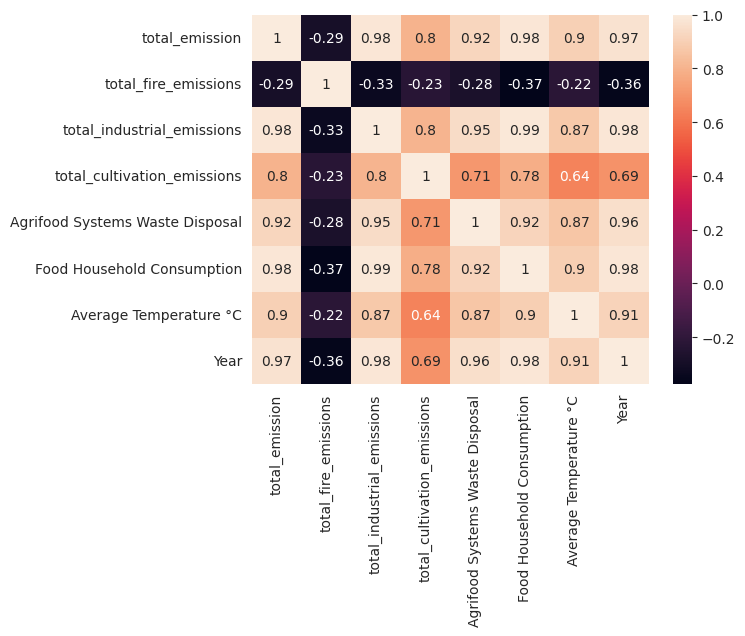

In [47]:
sns.heatmap(data = temp4.corr(), annot = True)

The positive relationship amongst most predictor and Global Temperature is demonstrated in the heatmap aboe. It is also important to highlight that a lot of predicotrs showcase a high Pearson's correlation coefficient and hence, this phenomenon should be taken into account during the modelling phase, in order to deal with multicolinearity issues.

## Key Insights

* The average temperature increase, along with urban population and total emissions showcase an upward trend
* Industrial processes emit the most CO2 in the agri-food sector, while fire emissions the least
* China, India, Brazil and the USA emit the most CO2 from the agri-food sector
* Europe has showcased the highest temperature rise, while southern Asia the lowest
* Temperature rise seems to be strongly related to Year abd Area
* Fire emissions do not seem to be related to temperature rise
* All agri-food sector processes emissions seem to be strongly, positively related to the increase in the average global temperature
* Oceania, Northen America, and Europe have the largest consumption emissions per capita

# Data pre-processing

## Handling Missing values

Let's begin with handling null values.

In [48]:
#Let's check the sum of null values for each variable
df.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


It seems like there are quite a few null values in need of treatment. It is important to understand whether the null values are null because data were not collected or because there is some meaning into it. I will check each variable seperately in order to make sense. Perhaps, the area will give some insight.

In [49]:
#Let's start with Savanna fires.
##I will make a new df series  'bool_series', that holds the boolean values of whether the Savanna fires column contains null values.
df['bool_series'] = pd.isnull(df["Savanna fires"])

In [50]:
# now using 'bool_series', I will check which areas have null values in the column 'Savanna fires'.
df.loc[df['bool_series'], 'Area'].unique()

array(['Holy See'], dtype=object)

It seems like Holy See is the only area that has no records of Savanna values. This makes sence since it is not possivle that such fire events occur in the city of Vatican. I will also see what other null values this Area has. It is a special case of an area since many features such as Forest fires, Savanna fires, manure, and tropical forest fires or farms do not exist.

In [51]:
# Let's see
null = df[df['Area'] == 'Holy See'].isnull()

In [52]:
null.sum()

Area                                0
Year                                0
Savanna fires                      31
Forest fires                       31
Crop Residues                      31
Rice Cultivation                    0
Drained organic soils (CO2)         0
Pesticides Manufacturing            0
Food Transport                      0
Forestland                          0
Net Forest conversion               0
Food Household Consumption          0
Food Retail                         0
On-farm Electricity Use             0
Food Packaging                      0
Agrifood Systems Waste Disposal     0
Food Processing                     0
Fertilizers Manufacturing           0
IPPU                                0
Manure applied to Soils            31
Manure left on Pasture              0
Manure Management                  31
Fires in organic soils              0
Fires in humid tropical forests    31
On-farm energy use                 31
Rural population                    0
Urban popula

As expected, those features contain null values because in reality they are non existent in the Holy see and hence, all the null values will be filled with 0.

In [53]:
df.loc[df['Area'] == 'Holy See'] = df[df['Area'] == 'Holy See'].fillna(0)

In [54]:
#Done.
df.loc[df['Area'] == 'Holy See']

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,bool_series
2835,Holy See,1990,0.0,0.0,0.0,9616.267306,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,768.0,340.0,370.0,18688.406793,0.905583,True
2836,Holy See,1991,0.0,0.0,0.0,9654.499823,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,774.0,330.0,360.0,18726.641610,-0.098083,True
2837,Holy See,1992,0.0,0.0,0.0,9616.267306,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,779.0,330.0,360.0,18684.924938,0.773167,True
2838,Holy See,1993,0.0,0.0,0.0,9616.267306,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,778.0,330.0,360.0,18684.874838,0.564417,True
2839,Holy See,1994,0.0,0.0,0.0,9649.123125,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,778.0,320.0,350.0,18717.728958,1.444500,True
2840,Holy See,1995,0.0,0.0,0.0,9687.355642,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,780.0,320.0,350.0,18755.973575,0.267167,True
2841,Holy See,1996,0.0,0.0,0.0,9687.355642,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,778.0,320.0,350.0,18755.981975,0.245167,True
2842,Holy See,1997,0.0,0.0,0.0,9649.123125,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,782.0,320.0,340.0,18717.754458,0.889583,True
2843,Holy See,1998,0.0,0.0,0.0,9649.123125,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,781.0,320.0,340.0,18717.784658,0.778250,True
2844,Holy See,1999,0.0,0.0,0.0,9649.123125,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,781.0,310.0,340.0,18717.817658,0.926500,True


Let's proceed with Forest fires

In [55]:
df['bool_series'] = pd.isnull(df["Forest fires"])

In [56]:
df.loc[df['bool_series'], 'Area'].unique()

array(['Monaco', 'San Marino'], dtype=object)

Only Monaco and San Marino have null Forest fires values. Thats also reasonable because there are no forest in those two areas.

In [57]:
#Here we locate the forest column of df only for the Areas of Monaco and San Marino and replace the null values with 0.
df.loc[(df['Area'] == 'Monaco')|(df['Area'] == 'San Marino'), ['Forest fires']] = df.loc[(df['Area'] == 'Monaco') | (df['Area']=='San Marino'), ['Forest fires']].fillna(0)

In [58]:
#Done
df.loc[(df['Area'] == 'Monaco')|(df['Area'] == 'San Marino')]

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,bool_series
4117,Monaco,1990,0.0,0.0,NaN,8976.562525,0.0,11.481085,0.0657,0.0,...,0.058149,NaN,NaN,0.0,29439.0,14435.0,15894.0,13617.314148,1.026750,True
4118,Monaco,1991,0.0,0.0,NaN,9014.795042,0.0,11.481085,0.0051,0.0,...,0.058149,NaN,NaN,0.0,29624.0,14577.0,15987.0,13204.334274,0.223833,True
4119,Monaco,1992,0.0,0.0,NaN,8976.562525,0.0,11.481085,0.0308,0.0,...,0.058149,NaN,NaN,0.0,29863.0,14722.0,16073.0,13618.319948,0.757167,True
4120,Monaco,1993,0.0,0.0,NaN,8976.562525,0.0,11.481085,0.0056,0.0,...,0.058149,NaN,NaN,0.0,30138.0,14864.0,16160.0,13619.547048,0.493333,True
4121,Monaco,1994,0.0,0.0,NaN,9009.418345,0.0,11.481085,0.0046,0.0,...,0.058149,NaN,NaN,0.0,30427.0,15002.0,16252.0,13651.372368,1.346000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5505,San Marino,2016,0.0,0.0,NaN,9009.418345,0.0,11.481085,0.9472,0.0,...,0.058149,NaN,NaN,1026.0,32177.0,16453.0,17381.0,13666.569235,1.684667,True
5506,San Marino,2017,0.0,0.0,NaN,9009.418345,0.0,11.481085,0.9791,0.0,...,0.058149,NaN,NaN,978.0,32422.0,16564.0,17492.0,13667.385535,1.665417,True
5507,San Marino,2018,0.0,0.0,NaN,9009.418345,0.0,11.481085,0.9884,0.0,...,0.058149,NaN,NaN,931.0,32626.0,16626.0,17530.0,13667.433635,2.006417,True
5508,San Marino,2019,0.0,0.0,NaN,9009.418345,0.0,11.481085,0.9953,0.0,...,0.058149,NaN,NaN,887.0,32796.0,16650.0,17527.0,13665.698735,1.968583,True


Let's proceed now with Fires in humid tropical forests.

In [59]:
df['bool_series'] = pd.isnull(df['Fires in humid tropical forests'])

In [60]:
df['bool_series'].sum()

124

In [61]:
df.loc[df['bool_series'], 'Area'].unique()

array(['Channel Islands', 'Liechtenstein', 'Monaco', 'San Marino'],
      dtype=object)

Those 4 areas do not have humid tropical forest and hence the null values will be replaced to 0.

In [62]:
#Also Done.
df.loc[df['bool_series'], 'Fires in humid tropical forests'] = df.loc[df['bool_series'], 'Fires in humid tropical forests'].fillna(0)

Now all the missing values that can be filled reasonably(MNAR - Missing Data Not at Random) have been corrected. The rest of the variables include many missing values, most probably because there are simply no such records present in the dataset at random (MAR - Missing Data at Random). Hence, those values will be filled using linear regression under the MICE (Multiple Imputation by Chained Equation) framework (see https://medium.com/nerd-for-tech/mice-and-knn-missing-value-imputations-explanation-and-implementation-with-python-d11c53f3f4b2 for a thorough review of mice).

In [63]:
#first we select all variables from df and write a list of the column names in the object num_features.
num_features = [col for col in df.columns]

In [64]:
#Area should be removed because in linear regression only continuous variables can be included.
num_features.remove('Area')

In [65]:
#let's perform MICE.
#call LinearRegression()
lr = LinearRegression()
#call the imputer and specify the estimator as lr, define the missing values as np.nan, and use a max_iteration stopping criterion. I think 10 cycles should be enough.
## I set random_state = 0 for reproducibility. I also set the imputation_order as 'roman' which simply takes the variables from left to right. Verbose = 2, showing one line per cycle.
imp = IterativeImputer(estimator=lr,missing_values=np.nan,  max_iter=10, verbose=2, imputation_order='roman',random_state=0)
X=imp.fit_transform(df.iloc[:, 1:])

[IterativeImputer] Completing matrix with shape (6965, 31)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.60
[IterativeImputer] Change: 37363.538976319775, scaled tolerance: 902077.76 
[IterativeImputer] Early stopping criterion reached.


In [66]:
#Now let's create df2 which includes the imputed values
df2 = pd.DataFrame(X, columns = num_features)

In [67]:
#No null values included
df2.isnull().sum()

Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
Total Population - Male            0
T

## TO BE CONTINUED...